Значение Хи квадрат из частотного теста:0.84648
Коэффициент автокорреляции при k=1:-0.10978607516444815
Модульное значение (8):0.020122266896857543
40577.037283400365
Практическое значение интервала -0.0392607814615471
Критическое значение значение интервала 0.02086548483159814
Практическое значение интервала для нормальных чисел 0.004547558531925844
Критическое значение значение интервала для нормальных чисел 0.009988740862429821


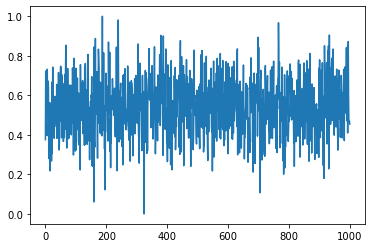

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 28 13:54:25 2021

@author: gorod
"""
#На практике n берут равными 6 или 12.
import random
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from matplotlib import *

from scipy import integrate
from numpy import sqrt, sin, cos, pi

#norm
def cor_test(buf):
    
    bufer = buf.copy()
    key = []
    for i in range(0, len(bufer)):
        key.append(bin(i))
    key = ''.join(key)
    key = key.replace('b', '')
    #print(key)  
    sum_key = 0
    sum_key_1 = 0
    key_1= str(key[-1]+key[:(len(key)-1)])
    
    for i in range(len(key)):
        sum_key+=int(key[i])
    for i in range(len(key_1)):
        sum_key_1+=int(key_1[i])
    
    top_sum_1=0
    low_sum_1=0
    low_sum_2=0
    
    for i in range(len(key)):
        top_sum_1+=(int(key[i])*int(key_1[i]))
    for i in range(len(key)):
        low_sum_1+=(int(key[i])**2)
    for i in range(len(key)):
        low_sum_2+=(int(key_1[i])**2) 
        
    R= ((len(key)*top_sum_1) - (sum_key*sum_key_1))/pow(((len(key)*low_sum_1 - sum_key**2)*((len(key)*low_sum_2) - sum_key_1**2)), 0.5)
    R_mod =(1/(len(key)-1))+(2/(len(key)-2))*pow(((len(key))*((len(key))-3))/(len(key)+1) , 0.5)
    print(f'Коэффициент автокорреляции при k=1:{R}')
    print(f'Модульное значение (8):{R_mod}') 

def interval_dov(buf):

    bufer = buf.copy()
    #print(bufer)
    x = np.linspace(1,50,len(bufer))
    def normal_dist(x , mean , sd):
        prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
        return prob_density

    mean = np.mean(x)
    sd = np.std(x)

    def f(x):
        return (x*((np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)))
    v, err = integrate.quad(f, 0, np.inf)
    print(v)
    middle = sum(bufer)/len(bufer)
    alpha = 0.05
    M_teor = 0.5
    d_pr = M_teor - middle 
    d_cr = np.sqrt(np.var(bufer)/(len(bufer) * alpha))
    
    print(f"Практическое значение интервала {d_pr}")
    print(f"Критическое значение значение интервала {d_cr}")
    
    bufer_normal = np.random.normal(loc=0.0, scale=1.0, size=len(bufer))
    minik = min(bufer_normal)
    #print(minik)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i] + np.abs(minik))
                           
    maxik = max(bufer_normal)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i])/maxik
    
    middle_normal = sum(bufer_normal)/len(bufer_normal)
    
    x_2 = 3.84
    d_pr_normal = M_teor - middle_normal 
    d_cr_normal = np.sqrt(x_2 * np.var(bufer_normal)/(len(bufer_normal)))
    
    print(f"Практическое значение интервала для нормальных чисел {d_pr_normal}")
    print(f"Критическое значение значение интервала для нормальных чисел {d_cr_normal}")


def fric_test(buf):#Частотный тест
    bufer = buf.copy()
    
    m = max(bufer)
    for i in range(0, len(bufer)):
        bufer[i] = bufer[i]/m
    
    #plt.plot(bufer)
    #plt.show()
    
    drob = 0.1
    #P_teor = len(buf)/10
    x_1 = x_2 = x_3 = x_4 = x_5 = x_6 = x_7 = x_8 = x_9 = x_10 = 0
    for i in range(0, len(bufer)):
        if bufer[i] <= drob:
            x_1 += 1
        elif (bufer[i] > drob and bufer[i] <= (drob * 2)):
            x_2 += 1
        elif (bufer[i] > drob * 2 and bufer[i] <= (drob * 3)):
            x_3 += 1
        elif (bufer[i] > drob * 3 and bufer[i] <= (drob * 4)):
            x_4 += 1
        elif (bufer[i] > drob * 4 and bufer[i] <= (drob * 5)):
            x_5 += 1
        elif (bufer[i] > drob * 5 and bufer[i] <= (drob * 6)):
            x_6 += 1
        elif (bufer[i] > drob * 6 and bufer[i] <= (drob * 7)):
            x_7 += 1
        elif (bufer[i] > drob * 7 and bufer[i] <= (drob * 8)):
            x_8 += 1
        elif (bufer[i] > drob * 8 and bufer[i] <= (drob * 9)):
            x_9 += 1
        elif (bufer[i] > drob * 9 and bufer[i] <= (drob * 10)):
            x_10 += 1
         
    P_teor = len(bufer) / (10 * len(bufer))
    
    x_1 = x_1/len(buf)
    x_2 = x_2/len(buf)
    x_3 = x_3/len(buf)
    x_4 = x_4/len(buf)
    x_5 = x_5/len(buf)
    x_6 = x_6/len(buf)
    x_7 = x_7/len(buf)
    x_8 = x_8/len(buf)
    x_9 = x_9/len(buf)
    x_10 = x_10/len(buf)
        
    X_2 = (((x_1 - P_teor) ** 2)/P_teor) + (((x_2 - P_teor) ** 2)/P_teor) + (((x_3 - P_teor) ** 2)/P_teor) + (((x_4 - P_teor) ** 2)/P_teor) + (((x_5 - P_teor) ** 2)/P_teor) + (((x_6 - P_teor) ** 2)/P_teor) + (((x_7 - P_teor) ** 2)/P_teor) + (((x_8 - P_teor) ** 2)/P_teor) + (((x_9 - P_teor) ** 2)/P_teor)  + (((x_10 - P_teor) ** 2)/P_teor)
        
    return X_2


n = 6

m = n/2
σ = np.sqrt(12/n)

z = []
V = 0.0
for i in range(0, 1000):
    for j in range(0, n):
        V += random.random()
    z.append((V - m)/σ)
    V = 0.0

#plt.plot(z)
minik = min(z)
for i in range(0, 1000):
    z[i]= z[i] + abs(minik)
maxik = max(z)
for i in range(0, 1000):
    z[i] = z[i]/maxik
#mz = 0, σz = 1.
#Формулой (сдвиг на mx и масштабирование на σx) преобразуем ряд Z в ряд x: x = z · σx + mx.
plt.plot(z)
print(f'Значение Хи квадрат из частотного теста:{fric_test(z)}')
cor_test(z)
interval_dov(z)



count    1000.000000
mean        0.539261
std         0.147615
min         0.000000
25%         0.437001
50%         0.535570
75%         0.640046
max         1.000000
dtype: float64


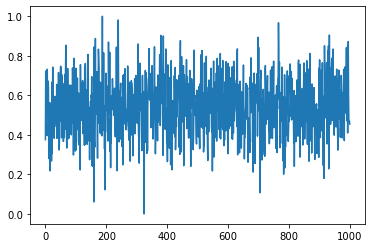

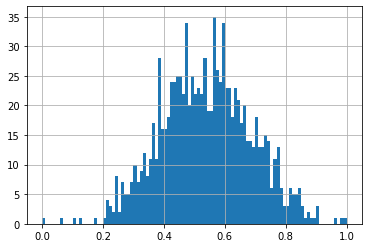

In [2]:
series = Series(z)
print(series.describe())
series.plot()
pyplot.show()

# histogram plot
series.hist(bins = 100)
pyplot.show()

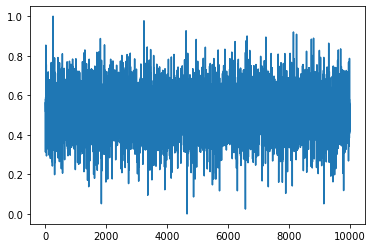

Значение Хи квадрат из частотного теста:1.9643772000000002
Коэффициент автокорреляции при k=1:-0.07755144594688382
Модульное значение (8):0.005478872060158867
Практическое значение интервала 0.4026324801355625
Критическое значение значение интервала 0.0008158631992812135
Практическое значение интервала для нормальных чисел 0.019782399022636288
Критическое значение значение интервала для нормальных чисел 0.0025049943149197352


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 28 19:04:02 2021

@author: gorod
"""

import random
import numpy as np
import matplotlib.pyplot as plt

def cor_test(buf):
    
    bufer = buf.copy()
    key = []
    for i in range(0, len(bufer)):
        key.append(bin(i))
    key = ''.join(key)
    key = key.replace('b', '')
    #print(key)  
    sum_key = 0
    sum_key_1 = 0
    key_1= str(key[-1]+key[:(len(key)-1)])
    
    for i in range(len(key)):
        sum_key+=int(key[i])
    for i in range(len(key_1)):
        sum_key_1+=int(key_1[i])
    
    top_sum_1=0
    low_sum_1=0
    low_sum_2=0
    
    for i in range(len(key)):
        top_sum_1+=(int(key[i])*int(key_1[i]))
    for i in range(len(key)):
        low_sum_1+=(int(key[i])**2)
    for i in range(len(key)):
        low_sum_2+=(int(key_1[i])**2) 
        
    R= ((len(key)*top_sum_1) - (sum_key*sum_key_1))/pow(((len(key)*low_sum_1 - sum_key**2)*((len(key)*low_sum_2) - sum_key_1**2)), 0.5)
    R_mod =(1/(len(key)-1))+(2/(len(key)-2))*pow(((len(key))*((len(key))-3))/(len(key)+1) , 0.5)
    print(f'Коэффициент автокорреляции при k=1:{R}')
    print(f'Модульное значение (8):{R_mod}') 

def interval_dov(buf):

    bufer = buf.copy()
    #print(bufer)
    for i in range(0, len(bufer)):
        bufer[i] = (bufer[i] / 63)
    
    middle = sum(bufer)/len(bufer)
    alpha = 0.05
    M_teor = 0.5
    d_pr = M_teor - middle 
    d_cr = np.sqrt(np.var(bufer)/(len(bufer) * alpha))
    
    print(f"Практическое значение интервала {d_pr}")
    print(f"Критическое значение значение интервала {d_cr}")
    
    bufer_normal = np.random.normal(loc=0.0, scale=1.0, size=len(bufer))
    minik = min(bufer_normal)
    #print(minik)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i] + np.abs(minik))
                           
    maxik = max(bufer_normal)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i])/maxik
    
    middle_normal = sum(bufer_normal)/len(bufer_normal)
    
    x_2 = 3.84
    d_pr_normal = M_teor - middle_normal 
    d_cr_normal = np.sqrt(x_2 * np.var(bufer_normal)/(len(bufer_normal)))
    
    print(f"Практическое значение интервала для нормальных чисел {d_pr_normal}")
    print(f"Критическое значение значение интервала для нормальных чисел {d_cr_normal}")

def fric_test(buf):#Частотный тест
    bufer = buf.copy()
    
    m = max(bufer)
    for i in range(0, len(bufer)):
        bufer[i] = bufer[i]/m
    
    plt.plot(bufer)
    plt.show()
    
    drob = 0.1
    #P_teor = len(buf)/10
    x_1 = x_2 = x_3 = x_4 = x_5 = x_6 = x_7 = x_8 = x_9 = x_10 = 0
    for i in range(0, len(bufer)):
        if bufer[i] <= drob:
            x_1 += 1
        elif (bufer[i] > drob and bufer[i] <= (drob * 2)):
            x_2 += 1
        elif (bufer[i] > drob * 2 and bufer[i] <= (drob * 3)):
            x_3 += 1
        elif (bufer[i] > drob * 3 and bufer[i] <= (drob * 4)):
            x_4 += 1
        elif (bufer[i] > drob * 4 and bufer[i] <= (drob * 5)):
            x_5 += 1
        elif (bufer[i] > drob * 5 and bufer[i] <= (drob * 6)):
            x_6 += 1
        elif (bufer[i] > drob * 6 and bufer[i] <= (drob * 7)):
            x_7 += 1
        elif (bufer[i] > drob * 7 and bufer[i] <= (drob * 8)):
            x_8 += 1
        elif (bufer[i] > drob * 8 and bufer[i] <= (drob * 9)):
            x_9 += 1
        elif (bufer[i] > drob * 9 and bufer[i] <= (drob * 10)):
            x_10 += 1
         
    P_teor = len(bufer) / (10 *len(bufer))
    x_1 = x_1/len(buf)
    x_2 = x_2/len(buf)
    x_3 = x_3/len(buf)
    x_4 = x_4/len(buf)
    x_5 = x_5/len(buf)
    x_6 = x_6/len(buf)
    x_7 = x_7/len(buf)
    x_8 = x_8/len(buf)
    x_9 = x_9/len(buf)
    x_10 = x_10/len(buf)
        
    X_2 = (((x_1 - P_teor) ** 2)/P_teor) + (((x_2 - P_teor) ** 2)/P_teor) + (((x_3 - P_teor) ** 2)/P_teor) + (((x_4 - P_teor) ** 2)/P_teor) + (((x_5 - P_teor) ** 2)/P_teor) + (((x_6 - P_teor) ** 2)/P_teor) + (((x_7 - P_teor) ** 2)/P_teor) + (((x_8 - P_teor) ** 2)/P_teor) + (((x_9 - P_teor) ** 2)/P_teor)  + (((x_10 - P_teor) ** 2)/P_teor)
        
    return X_2

r = []
buf = []
for i in range(0, 10000):
    if random.random() < 0.5:
        r.append(random.random() * (-1))
    else:
        r.append(random.random())
k = np.sqrt(8/np.pi)
for i in range(0, 10000):
    buf.append((1/k) * np.log((1 + r[i])/(1 - r[i])))
minik = min(buf)
for i in range(0, 10000):
    buf[i] = buf[i] + np.abs(minik)
print(f'Значение Хи квадрат из частотного теста:{fric_test(buf)}')
cor_test(buf)
interval_dov(buf)

count    10000.000000
mean         6.134154
std          1.149383
min          0.000000
25%          5.455320
50%          6.148653
75%          6.818265
max         11.830671
dtype: float64


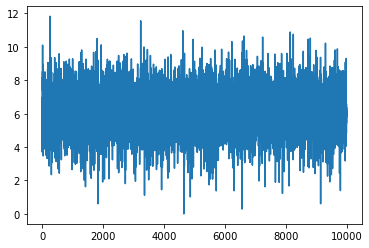

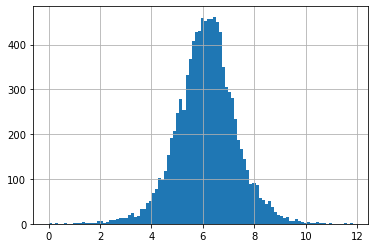

In [4]:
series = Series(buf)
print(series.describe())
series.plot()
pyplot.show()

# histogram plot
series.hist(bins = 100)
pyplot.show()

In [16]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 28 15:55:04 2021

@author: gorod
"""

import random
import numpy as np
import matplotlib.pyplot as plt

def cor_test(buf):
    
    bufer = buf.copy()
    key = []
    for i in range(0, len(bufer)):
        key.append(bin(i))
    key = ''.join(key)
    key = key.replace('b', '')
    #print(key)  
    sum_key = 0
    sum_key_1 = 0
    key_1= str(key[-1]+key[:(len(key)-1)])
    
    for i in range(len(key)):
        sum_key+=int(key[i])
    for i in range(len(key_1)):
        sum_key_1+=int(key_1[i])
    
    top_sum_1=0
    low_sum_1=0
    low_sum_2=0
    
    for i in range(len(key)):
        top_sum_1+=(int(key[i])*int(key_1[i]))
    for i in range(len(key)):
        low_sum_1+=(int(key[i])**2)
    for i in range(len(key)):
        low_sum_2+=(int(key_1[i])**2) 
        
    R= ((len(key)*top_sum_1) - (sum_key*sum_key_1))/pow(((len(key)*low_sum_1 - sum_key**2)*((len(key)*low_sum_2) - sum_key_1**2)), 0.5)
    R_mod =(1/(len(key)-1))+(2/(len(key)-2))*pow(((len(key))*((len(key))-3))/(len(key)+1) , 0.5)
    print(f'Коэффициент автокорреляции при k=1:{R}')
    print(f'Модульное значение (8):{R_mod}') 

def interval_dov(buf):

    bufer = buf.copy()
    #print(bufer)
    #for i in range(0, len(bufer)):
    #    bufer[i] = (bufer[i] / 63)
    
    middle = sum(bufer)/len(bufer)
    alpha = 0.05
    M_teor = 0
    d_pr = M_teor - middle 
    d_cr = np.sqrt(np.var(bufer)/(len(bufer) * alpha))
    
    print(f"Практическое значение интервала {d_pr}")
    print(f"Критическое значение значение интервала {d_cr}")
    
    bufer_normal = np.random.normal(loc=0.0, scale=1.0, size=len(bufer))
    minik = min(bufer_normal)
    #print(minik)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i] + np.abs(minik))
                           
    maxik = max(bufer_normal)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i])/maxik
    
    middle_normal = sum(bufer_normal)/len(bufer_normal)
    
    x_2 = 3.84
    d_pr_normal = M_teor - middle_normal 
    d_cr_normal = np.sqrt(x_2 * np.var(bufer_normal)/(len(bufer_normal)))
    
   # print(f"Практическое значение интервала для нормальных чисел {d_pr_normal}")
   # print(f"Критическое значение значение интервала для нормальных чисел {d_cr_normal}")

def fric_test(buf):#Частотный тест
    bufer = buf.copy()
    
    m = max(bufer)
    for i in range(0, len(bufer)):
        bufer[i] = bufer[i]/m
    
    #plt.plot(bufer)
    #plt.show()
    
    drob = 0.1
    #P_teor = len(buf)/10
    x_1 = x_2 = x_3 = x_4 = x_5 = x_6 = x_7 = x_8 = x_9 = x_10 = 0
    for i in range(0, len(bufer)):
        if bufer[i] <= drob:
            x_1 += 1
        elif (bufer[i] > drob and bufer[i] <= (drob * 2)):
            x_2 += 1
        elif (bufer[i] > drob * 2 and bufer[i] <= (drob * 3)):
            x_3 += 1
        elif (bufer[i] > drob * 3 and bufer[i] <= (drob * 4)):
            x_4 += 1
        elif (bufer[i] > drob * 4 and bufer[i] <= (drob * 5)):
            x_5 += 1
        elif (bufer[i] > drob * 5 and bufer[i] <= (drob * 6)):
            x_6 += 1
        elif (bufer[i] > drob * 6 and bufer[i] <= (drob * 7)):
            x_7 += 1
        elif (bufer[i] > drob * 7 and bufer[i] <= (drob * 8)):
            x_8 += 1
        elif (bufer[i] > drob * 8 and bufer[i] <= (drob * 9)):
            x_9 += 1
        elif (bufer[i] > drob * 9 and bufer[i] <= (drob * 10)):
            x_10 += 1
         
    P_teor = len(bufer) / (10 *len(bufer))
    x_1 = x_1/len(buf)
    x_2 = x_2/len(buf)
    x_3 = x_3/len(buf)
    x_4 = x_4/len(buf)
    x_5 = x_5/len(buf)
    x_6 = x_6/len(buf)
    x_7 = x_7/len(buf)
    x_8 = x_8/len(buf)
    x_9 = x_9/len(buf)
    x_10 = x_10/len(buf)
        
    X_2 = (((x_1 - P_teor) ** 2)/P_teor) + (((x_2 - P_teor) ** 2)/P_teor) + (((x_3 - P_teor) ** 2)/P_teor) + (((x_4 - P_teor) ** 2)/P_teor) + (((x_5 - P_teor) ** 2)/P_teor) + (((x_6 - P_teor) ** 2)/P_teor) + (((x_7 - P_teor) ** 2)/P_teor) + (((x_8 - P_teor) ** 2)/P_teor) + (((x_9 - P_teor) ** 2)/P_teor)  + (((x_10 - P_teor) ** 2)/P_teor)
        
    return X_2
    
N = 10000
z1 = []
def gen_vichet():
    x_0 = 19
    #a = 52#a- 1 кратно p для любого простого p# равенство длинны последовательности достигается при а = 1, а = 270, a= 539  
    m = (2 ** 31) - 1#269
    c = int(m / 5) #53
    a = (7 ** 5)#270 
    
    counter = 0
    buf = []
    while (x_0 not in buf) and (counter != 10000):# ограничение по набору тестируемых данных
        buf.append(x_0)
        x =  ((a * x_0) + c) % m
        x_0 = x
        counter += 1
    maxic = max(buf)
    for i in range(0, len(buf)):
        buf[i] = buf[i]/maxic
    #print(random.choice(buf))
    return buf
#random_list = buf
for i in range(0, N):    
    z1.append(np.sqrt(-2 * np.log(random.random())) * np.cos(2*np.pi*random.random()))
    z1.append(np.sqrt(-2 * np.log(random.random())) *np.sin(2*np.pi*random.random()))
z1= sorted(z1)
#-------------- Средняя величина---------------------
mz = sum(z1)/(2*N)
print(mz)
#-------------- Стандартное отклонение ------------
difference = [(x - mz)**2 for x in z1]
stz = np.sqrt(sum(difference)/(len(z1) - 1))
print(stz)
#--------------- Нормализованные данные ----------
zz = (difference)/stz
mzN = sum(zz)/(2*N)
print(mzN)
difference_1 = [(x - mzN)**2 for x in zz]
stzN = np.sqrt(sum(difference_1)/(2 * (N-1)))
print(stzN)

maxik = max(z1)
z1 = [x/max(z1) for x in z1]

print(f"Значение Хи квадрат из частотного теста:{fric_test(z1)}")
cor_test(z1)
interval_dov(z1)

-0.0014638155365614145
1.00208112435725
1.0020310203010345
1.4054555582618957
Значение Хи квадрат из частотного теста:3.4662516999999995
Коэффициент автокорреляции при k=1:-0.07207771344445944
Модульное значение (8):0.003735227464709578
Практическое значение интервала 0.00039737709039296034
Критическое значение значение интервала 0.008602179431669276


In [7]:
random.choice(buf)

8.281569611690086

count    20000.000000
mean        -0.000397
std          0.272032
min         -1.038995
25%         -0.185143
50%         -0.000450
75%          0.182496
max          1.000000
dtype: float64


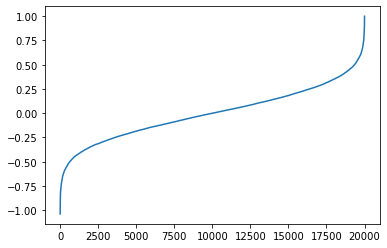

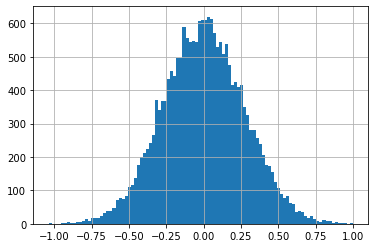

In [17]:
series = Series(z1)
print(series.describe())
series.plot()
pyplot.show()

# histogram plot
series.hist(bins=100)
pyplot.show()